In [25]:
import cv2 as cv
import numpy as np
import mediapipe as mp
from datetime import datetime
import matplotlib.pyplot as plt
import skimage
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
# takes hand detection output to add bounding rectangles
def find_hands(current, width, height):
    rect_list = []
    hand_classifier = []
    # iterates through hand tracking data per hand
    if current.multi_hand_landmarks:
        for index, info in enumerate(current.multi_handedness):
            which = info.classification[0].label
            hand_classifier.append(which)
        for index, hand in enumerate(current.multi_hand_landmarks):
            # values from 0 to 1 converted into values corresponding to video size
            hand_list = []
            for individual in hand.landmark:
                hand_list.append((int(individual.x * width), int(individual.y * height), int(individual.z * width)))
            # developing bounding box coordinates
            x_values = np.array(hand_list)[:, 0]
            y_values = np.array(hand_list)[:, 1]
            x_min = int(np.min(x_values) - 10)
            y_min = int(np.min(y_values) - 10)
            x_max = int(np.max(x_values) + 10)
            y_max = int(np.max(y_values) + 10)
            rect_list.append(((x_min, y_min), (x_max, y_max), (0, 255, 0), hand_classifier[index]))
    return rect_list

In [19]:
def capture():
    video = cv.VideoCapture(0, cv.CAP_DSHOW) #captureDevice = camera
    running, original = video.read()
    h, w, _ = original.shape    
    # machine learning algorithm (using mediapipe, via google)
    init_hands = mp.solutions.hands
    hands = init_hands.Hands()
    savedFrames = []
    # continuous looping
    while True:
        running, original = video.read()
        if not running:
            break
        # hand processing
        track_curr = hands.process(original)
        # calculating bounding rectangles
        current_rects = find_hands(track_curr, w, h)

        if current_rects:
          if len(current_rects) > 1:
            print('Please use only one hand')
          else:
            current_rect = current_rects[0]
            top_left = current_rect[0]
            bottom_left = (current_rect[0][0], current_rect[1][1])
            top_right = (current_rect[1][0], current_rect[0][1])
            bottom_right=current_rect[1]

            left = top_left[0]
            right= top_right[0]
            top = top_left[1]
            bottom = bottom_left[1]
            if top > 0 and left > 0 and bottom > 0 and right > 0:
              crop = original[top:bottom, left:right]   
              savedFrames.append(crop)
              cv.rectangle(original, current_rect[0], current_rect[1], 5, 1)
        cv.imshow("Video Feed", original)
        k = cv.waitKey(1) & 0xff
        if k == 27:
            break
    cv.destroyAllWindows()
    video.release()
    return savedFrames

In [10]:
frames = capture()

Please use only one hand
Please use only one hand
Please use only one hand


<class 'numpy.ndarray'>


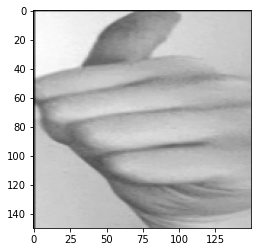

In [39]:
first_image = frames[50]
print(type(first_image))
img = resize(color.rgb2gray(first_image), (150,150))

plt.imshow(img, cmap = 'gray')